<a href="https://colab.research.google.com/github/Divyanshu-Singh-Chauhan/Image-Forgery-Detection/blob/DL/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Building Masks for Authentic ELA images

In [ ]:
##### 
import os
import numpy as np
import cv2
path = "/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA/aut"
filename = "/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK/aut"
os.chdir(path)
t_ids = os.listdir(path)
for names in t_ids:
  img_path = path+"/"+names
  img = cv2.imread(img_path,0)
  image = np.zeros((img.shape[0],img.shape[1]))
  ids,ext = os.path.splitext(names)
  cv2.imwrite(filename+"/"+ids+"_gt"+ext,image)

# Renaming all the masked images #

In [ ]:
import os 
os.chdir('/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA')
list1 = os.listdir('aut')
list2 = os.listdir('tamp')
print(len(list2), " ela-aut-images")
print(len(list1), " ela-tamp-images")
os.chdir('/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK')
list1 = os.listdir('aut')
list2 = os.listdir('tamp')
print(len(list2), " mask-aut-images")
print(len(list1), " msak-tamp-images")
#!zip -r ela.zip  CASIA2_ELA/

5123  ela-aut-images
7491  ela-tamp-images
3920  mask-aut-images
7491  msak-tamp-images


In [ ]:
### Renaming the images ###
import os
import numpy as np
import cv2
#path = "/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA/aut"
path = "/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK"
os.chdir(path)
t_ids = os.listdir(path + '/tamp')
for names in t_ids:
  ids,ext = os.path.splitext(names)
  ss = '_gt'
  if ids.endswith(ss): 
    res = ids[:-(len(ss))] 
    os.rename(path+'/tamp/'+names,path+'/tamp/'+res+ext)

# Creating Zip Files

In [ ]:
### building zip files of all 4 folders 
path = "/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA"
os.chdir(path)
#!zip -r aut-mask.zip aut/
#!zip -r tamp-mask.zip tamp/
#!zip -r tamp-ela.zip tamp/
!zip -r aut-ela.zip aut/

In [ ]:
import os 
path = "/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK/aut"
list1 = os.listdir(path)
print(len(list1))
path1 = '/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA/aut/'
list2 = os.listdir(path1)
print(len(list2))
#for names in list1:
  # print(os.path.join(path1,names))



7491
7491


# Changing the Extension of all the Images to a Common One

In [ ]:
def rename_ext(root_dir = '/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/train', ext1 = '.png'):

  import os
  train_path = root_dir
  ext1 = ext1
  dirs = os.listdir(train_path)
  for dir in dirs:
    t_ids = os.listdir(os.path.join(train_path,dir)) 
    for names in t_ids:
      ids,ext = os.path.splitext(names)
      os.rename(os.path.join(train_path,dir,names),os.path.join(train_path,dir,ids+ext1))

In [ ]:
### GETTING THE DATASET FROM DRIVE AND PROCESSING IT TO A SINGLE FOLDER ###

import os 
os.chdir('/content')
!mkdir train 
!cd train && mkdir images && mkdir masks
os.chdir('/content/aut1')
!mv * ../train/images/

os.chdir('/content/tamp1')
!mv * ../train/images/

os.chdir('/content/aut')
!mv * ../train/masks/

os.chdir('/content/tamp')
!mv * ../train/masks/

# Removing Non Consistent Images Between Masks and ELA

In [ ]:
import os
def remove_images():

  tamp_masks_path = '/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK/tamp'
  tamp_ela_path = '/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA/tamp'
  a = 0
  list1 = os.listdir(tamp_ela_path)
  for names in list1:
    filename = os.path.join(tamp_masks_path,names)
    os.chdir(tamp_ela_path)
    if int(os.path.exists(filename)) == 0:
      a+=1
      print(a)
      !rm $names

remove_images()  

In [ ]:
import os
def remove_images():

  tamp_masks_path = '/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK/tamp'
  tamp_ela_path = '/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA/tamp'
  a = 0
  list1 = os.listdir(tamp_masks_path)
  for names in list1:
    filename = os.path.join(tamp_ela_path,names)
    os.chdir(tamp_masks_path)
    if int(os.path.exists(filename)) == 0:
      a+=1
      print(a)
      !rm $names

remove_images() 

In [ ]:
 list1 = os.listdir('/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA/tamp')
print(len(list1))

list2 = os.listdir('/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK/tamp')
print(len(list2))

3813
3813


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA')
!zip -r upd-tamp-ela.zip tamp/

os.chdir('/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK')
!zip -r upd-tamp-mask.zip tamp/

In [ ]:
import os
def remove_images():

  tamp_masks_path = '/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_MASK/tamp'
  tamp_ela_path = '/content/drive/My Drive/Colab Notebooks/CASIA2_COPY/CASIA2_ELA/tamp'
  a = 0
  list1 = os.listdir(tamp_ela_path)
  for names in list1:
    filename = os.path.join(tamp_masks_path,names)
    os.chdir(tamp_ela_path)
    if int(os.path.exists(filename)) == 0:
      a+=1
      print(a)
      !rm $names

remove_images() 

# Working With Filters ###

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity

In [ ]:
def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]
	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")
 
  # loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top to
	# bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
			# perform the actual convolution by taking the
			# element-wise multiplicate between the ROI and
			# the kernel, then summing the matrix
			k = (roi * kernel).sum()
			# store the convolved value in the output (x,y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k


  # rescale the output image to be in the range [0, 255]
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")
	# return the output image
	return output      

In [ ]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

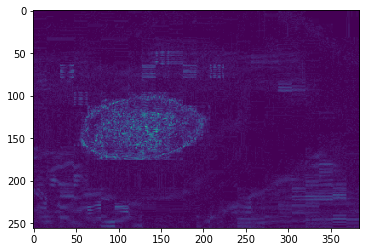

In [ ]:
img = cv2.imread('/content/ela-experiment.jpg',0)
lap_fil_img = convolve(img,laplacian)
sobelx_fil_img = convolve(img,sobelX)      #### For horizontal edges
sobely_fil_img = convolve(img,sobelY)      #### For vertical edges
gradient_magnitude = np.sqrt(np.square(sobelx_fil_img) + np.square(sobely_fil_img))
plt.imshow(img)

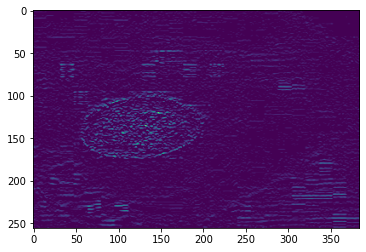

In [ ]:
plt.imshow(sobely_fil_img)  